In [1]:
from explainability_confirmation.examine_explanation import examine_interpretation
from explainability_confirmation.examine_explanation import examine_local_fidelity
from explainability_confirmation.examine_explanation import get_lipschitz
from explainability_confirmation.examine_explanation import gradual_elimination
from explainability_confirmation.examine_explanation import check_consistency

In [88]:
from sklearn.datasets import make_classification
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn import preprocessing
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import lime

import eli5
from eli5.sklearn import PermutationImportance
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from pdpbox import pdp, get_dataset, info_plots
import shap
import lime

from sklearn.svm import SVC

shap.initjs()

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from collections import Counter
import sys
sys.path.insert(1, '../..')

from uci_utils import *

import eli5
from eli5.sklearn import PermutationImportance

In [10]:
def get_shap_interpretation(model, X, used_explainer=shap.TreeExplainer, explained_label=1):
    
    explainer = shap.TreeExplainer(model)
    
    shap_values = explainer.shap_values(X)

    
    shap_values = shap_values[explained_label]
    shap_imps = []
    transposed_shap = [*zip(*shap_values)]
    for idx, col in enumerate(transposed_shap):
        shap_imps.append(np.mean(list(map(lambda x: abs(x), col))))
    return shap_imps



In [91]:
def data_pipeline(loaded_data):
    X, y = loaded_data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    forest = RandomForestClassifier()
    forest.fit(X_train, y_train)
    rf_score = forest.score(X_test, y_test)
    print('RF SCORE:')
    print(rf_score)
    
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    lr_score = lr.score(X_test, y_test)
    print('LR SCORE:')
    print(lr_score)
    
    sv = SVC()
    sv.fit(X_train, y_train)
    sv_score = sv.score(X_test, y_test)
    print('SVM SCORE:')
    print(sv_score)

## Seismic data set

In [28]:
s_X, s_y = UCI_Dataset_Loader.seismic()

In [29]:
scaler = StandardScaler()
scaler.fit(s_X)
s_X = scaler.transform(s_X)
s_X = pd.DataFrame(s_X)

In [30]:
s_X_train, s_X_test, s_y_train, s_y_test = train_test_split(s_X, s_y, test_size=0.33, random_state=42)

In [31]:
s_rf = RandomForestClassifier()
s_rf.fit(s_X_train, s_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
s_rf.score(s_X_test, s_y_test)

0.9296600234466589

In [34]:
s_lr = LogisticRegression()
s_lr.fit(s_X_train, s_y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
s_rf.score(s_X_test, s_y_test)

0.9296600234466589

[0.17198067632850234,
 0.23478260869565226,
 0.2657004830917874,
 0.27826086956521734,
 0.2927536231884059,
 0.2917874396135266,
 0.3294685990338164,
 0.34782608695652173,
 0.37777777777777777,
 0.34879227053140094]

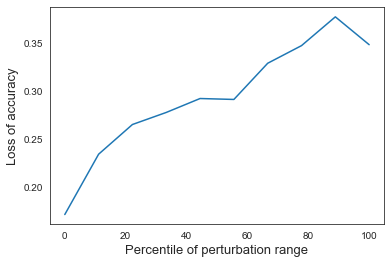

In [83]:
examine_local_fidelity(rf, X_test.iloc[:100], y_test[:100], epsilon=10, framework='lime', count_per_step=15)

[0.1768115942028986,
 0.19903381642512086,
 0.23285024154589373,
 0.28019323671497587,
 0.29661835748792265,
 0.32270531400966174,
 0.31207729468599044,
 0.3458937198067633,
 0.33043478260869563,
 0.36618357487922715]

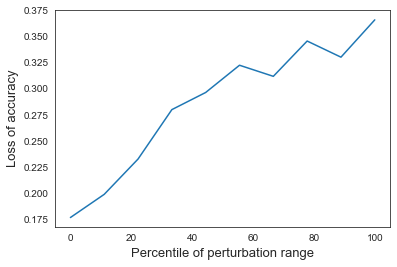

In [85]:
examine_local_fidelity(rf, X_test.iloc[:100], y_test[:100], epsilon=10, count_per_step=15)

,0,1,Feature names,Loss of accuracy
0,4,0.035922,4,0.015372
1,2,0.036331,2,0.024474
2,9,0.037939,9,0.026901
3,8,0.039487,8,0.021036
4,10,0.040405,10,0.022249
5,3,0.044356,3,0.036206
6,7,0.045180,7,0.023665
7,11,0.064738,11,0.035194
8,13,0.080729,13,0.082120
9,0,0.087163,0,0.043689


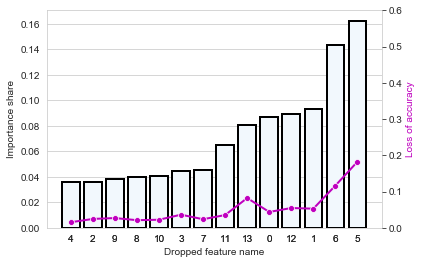

In [60]:
gradual_elimination(rf, X_test, y_test, importance_shares, single_drop=True)

## Seeds

In [36]:
seed_X, seed_y = UCI_Dataset_Loader.seeds()

In [40]:
data_pipeline(seed_X, seed_y)

RF SCORE:
0.9420289855072463
LR SCORE:
0.8840579710144928


## Adult income

In [45]:
data_pipeline(UCI_Dataset_Loader.adult())

RF SCORE:
0.847105899869719
LR SCORE:
0.8019728270984552


## Car eval

In [46]:
data_pipeline(UCI_Dataset_Loader.car())

RF SCORE:
0.9229422066549913
LR SCORE:
0.8756567425569177


## Credit default

In [47]:
data_pipeline(UCI_Dataset_Loader.credit_default())

RF SCORE:
0.8023232323232323
LR SCORE:
0.7820202020202021


## EColi

In [50]:
data_pipeline(UCI_Dataset_Loader.ecoli())

RF SCORE:
0.8468468468468469
LR SCORE:
0.7477477477477478


## EEG to Predict Eye State

In [51]:
data_pipeline(UCI_Dataset_Loader.eeg_eyes())

RF SCORE:
0.8853155339805825
LR SCORE:
0.6341019417475728


In [59]:
eeg_X, eeg_y = UCI_Dataset_Loader.eeg_eyes()

In [ ]:
e_X_train, e_X_test, e_y_

In [ ]:
eeg_rf = RandomForestClassifier()
egg.rf.fit

## Synthetic data

In [101]:
n_samples = 1000
de_linearize = lambda X: np.cos(1.5 * np.pi * X) + np.cos( 5 * np.pi * X )
X = np.sort(np.random.rand(n_samples)) * 2
# X = X.reshape(X, (-1, 1))
y = de_linearize(X) + np.random.randn(n_samples) * 0.3

In [102]:
synth_X = pd.DataFrame(X)
synth_X[1] = y
synth_X.columns= ['x', 'y']

In [108]:
synth_y = [int(y>de_linearize(x)) for x, y in zip(X,y)]

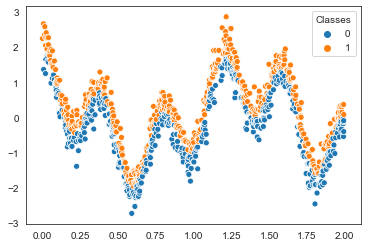

In [196]:
sns.scatterplot(X, y, hue=synth_y)
plt.legend(title='Classes')

In [107]:
data_pipeline((synth_X, synth_y))

RF SCORE:
0.8545454545454545
LR SCORE:
0.5878787878787879
SVM SCORE:
0.6


In [113]:
synth_X_train, synth_X_test, synth_y_train, synth_y_test = train_test_split(synth_X, synth_y)

synth_rf = RandomForestClassifier().fit(synth_X_train, synth_y_train)
print(synth_rf.score(synth_X_test, synth_y_test))


0.844


## AVG SHAP

In [116]:
synth_shap = get_shap_interpretation(synth_rf, synth_X_test)

[0.24639999999999995,
 0.24527999999999994,
 0.24712,
 0.24951999999999996,
 0.24824000000000002,
 0.24519999999999997,
 0.24192000000000002,
 0.2522399999999999,
 0.2447999999999999,
 0.23983999999999994]

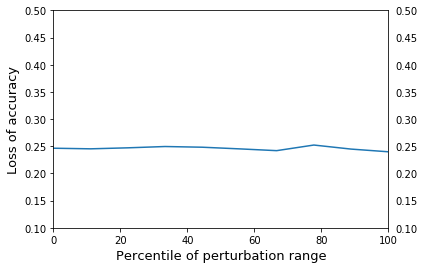

In [139]:
examine_interpretation(synth_rf, synth_X_test, synth_y_test, synth_shap, epsilon=0.5, count_per_step=50, ylim=[0.1, 0.5])

,0,1,Feature names,Loss of accuracy
0,0,0.184388,x,0.240
1,1,0.231895,y,0.316


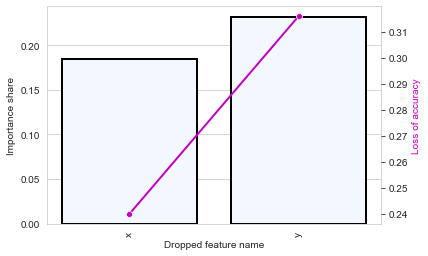

In [140]:
gradual_elimination(synth_rf, synth_X_test, synth_y_test, synth_shap)

## Permutation

In [142]:
synth_perm = PermutationImportance(synth_rf).fit(synth_X_test, synth_y_test).feature_importances_

[0.24727999999999994,
 0.25095999999999985,
 0.24975999999999987,
 0.2453599999999999,
 0.24240000000000006,
 0.2419199999999999,
 0.24319999999999997,
 0.24728000000000006,
 0.24944,
 0.24336000000000002]

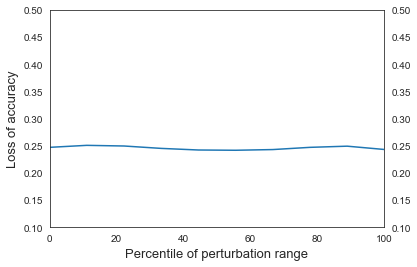

In [143]:
examine_interpretation(synth_rf, synth_X_test, synth_y_test, synth_perm, epsilon=0.5, count_per_step=50, ylim=[0.1, 0.5])

,0,1,Feature names,Loss of accuracy
0,0,0.2496,x,0.240
1,1,0.3600,y,0.316


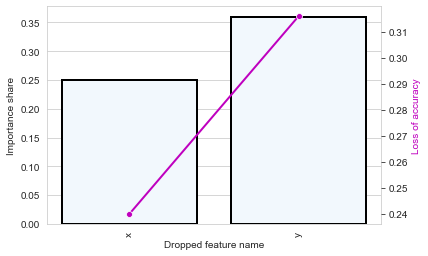

In [144]:
gradual_elimination(synth_rf, synth_X_test, synth_y_test, synth_perm)

## LOCAL FIDELITY

[0.17784,
 0.20196000000000003,
 0.22512,
 0.23839999999999995,
 0.244,
 0.24560000000000004,
 0.26071999999999995,
 0.26083999999999996,
 0.26491999999999993,
 0.2801999999999999]

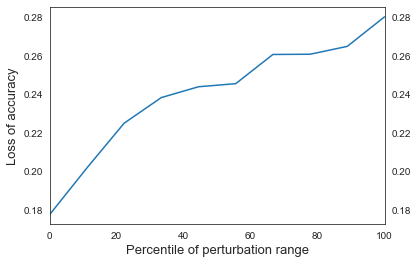

In [149]:
examine_local_fidelity(synth_rf, synth_X_test, synth_y_test, epsilon=0.75, count_per_step=100)

[0.0,
 0.08919999999999995,
 0.10240000000000005,
 0.12479999999999991,
 0.13639999999999997,
 0.15959999999999996,
 0.17080000000000006,
 0.1824,
 0.16360000000000008,
 0.17520000000000002]

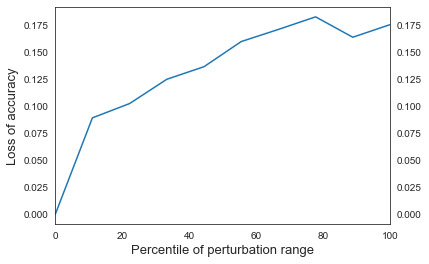

In [197]:
examine_local_fidelity(synth_rf, synth_X_test, synth_y_test, epsilon=0.75, count_per_step=10, from_zero=True)

[0.0,
 0.12480000000000002,
 0.16879999999999995,
 0.1956,
 0.19079999999999986,
 0.21960000000000002,
 0.20840000000000003,
 0.2116,
 0.22239999999999993,
 0.24320000000000008]

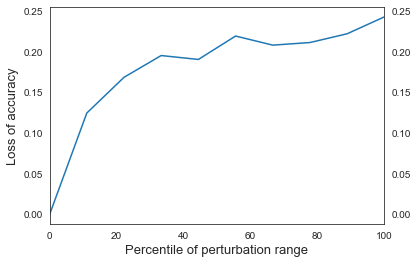

In [198]:
examine_local_fidelity(synth_rf, synth_X_test, synth_y_test, framework='lime', epsilon=0.75, count_per_step=10, from_zero=True)

[0.23256,
 0.238,
 0.23624000000000012,
 0.24044,
 0.2453599999999999,
 0.25,
 0.25159999999999993,
 0.25632,
 0.25751999999999997,
 0.25892000000000004]

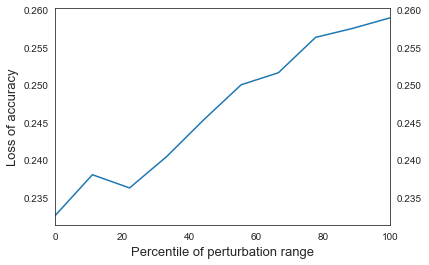

In [150]:
examine_local_fidelity(synth_rf, synth_X_test, synth_y_test, framework='lime', epsilon=0.75, count_per_step=100)

Using 250 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.



Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN

Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN
Found NaN


[0.17427999999999988,
 0.20663999999999993,
 0.2248,
 0.23592000000000002,
 0.24436000000000002,
 0.2515200000000001,
 0.26560000000000006,
 0.2695200000000001,
 0.27864,
 0.27771999999999997]

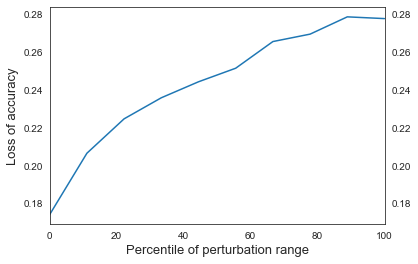

In [269]:
examine_local_fidelity(synth_rf, synth_X_test, synth_y_test, framework='shap', epsilon=0.75, count_per_step=100, used_explainer=shap.KernelExplainer)

In [260]:
test[test['x']==True]

,x,y
221,True,True


## Non linear stability

In [153]:
synth_lip_shap = get_lipschitz(synth_rf, synth_X_test, synth_y_test, epsilon=0.75)

In [156]:
synth_lip_lime = get_lipschitz(synth_rf, synth_X_test, synth_y_test, epsilon=0.75, framework='lime')

Text(0, 0.5, 'Lipschitz estimate')

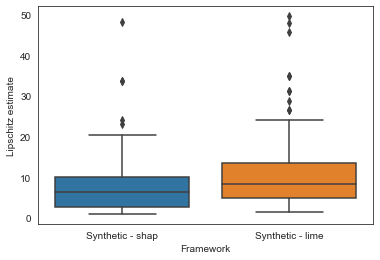

In [179]:
lip_df = pd.DataFrame({'Synthetic - shap':synth_lip_shap, 'Synthetic - lime':synth_lip_lime})
sns.boxplot(x="variable", y="value", data=pd.melt(lip_df))

plt.xlabel('Framework')
plt.ylabel('Lipschitz estimate')

## Stability 2

In [180]:
synth_lip_shap2 = get_lipschitz(synth_rf, synth_X_test, synth_y_test, epsilon=0.25)
synth_lip_lime2 = get_lipschitz(synth_rf, synth_X_test, synth_y_test, epsilon=0.25, framework='lime')

In [183]:
print(len(synth_lip_shap2))
print(len(synth_lip_lime2))

<class 'list'>
125


Text(0, 0.5, 'Lipschitz estimate')

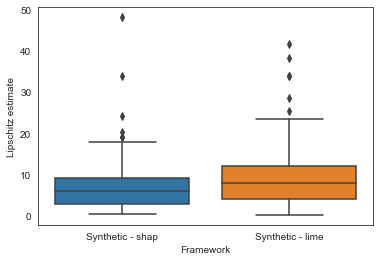

In [184]:
lip_df2 = pd.DataFrame({'Synthetic - shap':synth_lip_shap2, 'Synthetic - lime':synth_lip_lime2[:-1]})
sns.boxplot(x="variable", y="value", data=pd.melt(lip_df2))

plt.xlabel('Framework')
plt.ylabel('Lipschitz estimate')

## Stability 3

In [185]:
synth_lip_shap3 = get_lipschitz(synth_rf, synth_X_test, synth_y_test, epsilon=1.5)
synth_lip_lime3 = get_lipschitz(synth_rf, synth_X_test, synth_y_test, epsilon=1.5, framework='lime')

Text(0, 0.5, 'Lipschitz estimate')

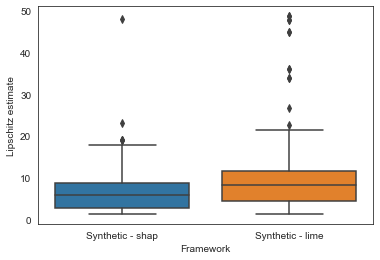

In [186]:
lip_df3 = pd.DataFrame({'Synthetic - shap':synth_lip_shap3, 'Synthetic - lime':synth_lip_lime3})
sns.boxplot(x="variable", y="value", data=pd.melt(lip_df3))

plt.xlabel('Framework')
plt.ylabel('Lipschitz estimate')

In [191]:
synth_lip_shap3 = get_lipschitz(synth_rf, synth_X_test, synth_y_test, epsilon=0.05)
synth_lip_lime3 = get_lipschitz(synth_rf, synth_X_test, synth_y_test, epsilon=0.05, framework='lime')

Text(0, 0.5, 'Lipschitz estimate')

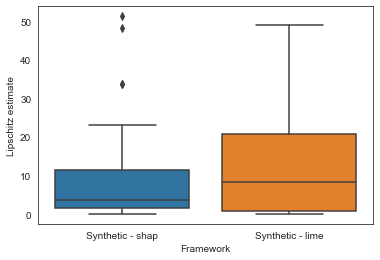

In [194]:
lip_df3 = pd.DataFrame({'Synthetic - shap':synth_lip_shap3[:50], 'Synthetic - lime':synth_lip_lime3[:50]})
sns.boxplot(x="variable", y="value", data=pd.melt(lip_df3))

plt.xlabel('Framework')
plt.ylabel('Lipschitz estimate')

In [230]:
print(len(synth_lip_shap3))

64


Text(0, 0.5, 'Lipschitz estimate')

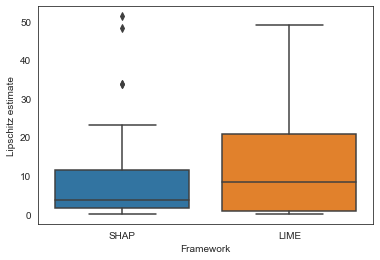

In [227]:
lip_df3 = pd.DataFrame({'SHAP':synth_lip_shap3[:50], 'LIME':synth_lip_lime3[:50]})
sns.boxplot(x="variable", y="value", data=pd.melt(lip_df3))

plt.xlabel('Framework')
plt.ylabel('Lipschitz estimate')

## Non linear consistency

In [167]:
synth_X_train1, synth_X_test1, synth_y_train1, synth_y_test1 = train_test_split(synth_X, synth_y, test_size=0.2, random_state=1)

synth_forest_model1 = RandomForestClassifier()
synth_forest_model1.fit(synth_X_train1, synth_y_train1)

synth_X_train2, synth_X_test2, synth_y_train2, synth_y_test2 = train_test_split(synth_X, synth_y, test_size=0.2, random_state=2)

synth_forest_model2 = RandomForestClassifier()
synth_forest_model2.fit(synth_X_train2, synth_y_train2)

synth_X_train3, synth_X_test3, synth_y_train3, synth_y_test3 = train_test_split(synth_X, synth_y, test_size=0.2, random_state=3)

synth_forest_model3 = RandomForestClassifier()
synth_forest_model3.fit(synth_X_train3, synth_y_train3)

synth_X_train4, synth_X_test4, synth_y_train4, synth_y_test4 = train_test_split(synth_X, synth_y, test_size=0.2, random_state=4)

synth_forest_model4 = RandomForestClassifier()
synth_forest_model4.fit(synth_X_train4, synth_y_train4)

synth_X_train5, synth_X_test5, synth_y_train5, synth_y_test5 = train_test_split(synth_X, synth_y, test_size=0.2, random_state=5)

synth_forest_model5 = RandomForestClassifier()
synth_forest_model5.fit(synth_X_train5, synth_y_train5)

synth_X_train_cons, synth_X_test_cons, synth_y_train_cons, synth_y_test_cons = train_test_split(synth_X, synth_y, test_size=200, random_state=6)

In [168]:
synth_models = [synth_forest_model1, synth_forest_model2, synth_forest_model3, synth_forest_model4, synth_forest_model5]

In [175]:
synth_cons_shap = check_consistency(synth_models, synth_X_test_cons, synth_y_test_cons, sample_num=50)

In [174]:
synth_cons_lime = check_consistency(synth_models, synth_X_test_cons, synth_y_test_cons, sample_num=50, framework='lime')

Text(0, 0.5, 'Consistency value')

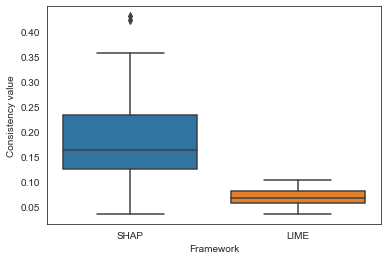

In [178]:
cons_df = pd.DataFrame({'SHAP':synth_cons_shap, 'LIME':synth_cons_lime})
sns.boxplot(x="variable", y="value", data=pd.melt(cons_df))
plt.xlabel('Framework')
plt.ylabel('Consistency value')

# MNIST

In [75]:
data = sklearn.datasets.load_digits()

In [213]:
mnist_data = pd.DataFrame(data.data)
mnists_data = StandardScaler().fit_transform(mnist_data)
X_train, X_test, y_train, y_test = train_test_split(mnist_data, data.target)

In [214]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9555555555555556

In [215]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9333333333333333

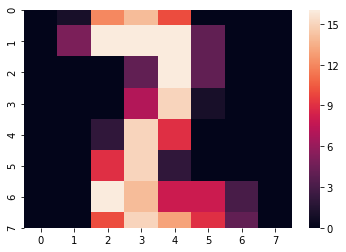

In [25]:
sns.heatmap(np.reshape(X_test[0], (8,8)))

[0.00533333333333319,
 0.07022222222222219,
 0.1200000000000001,
 0.15555555555555556,
 0.20266666666666666,
 0.24577777777777776,
 0.2626666666666666,
 0.2991111111111111,
 0.3168888888888888,
 0.34444444444444455]

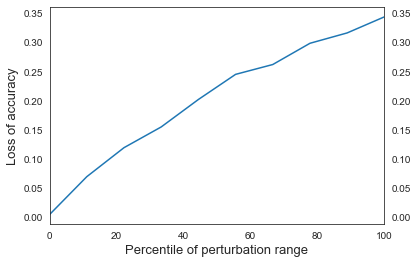

In [222]:
examine_local_fidelity(rf, X_test, y_test, epsilon=120)

In [27]:
lr.predict([X_test[0]])

array([2])

In [221]:
b_lime_l_vals = get_lipschitz(rf, X_test, y_test, epsilon=3, sample_num=30, framework='lime')

In [225]:
b_lime_l_vals

[]

# Creating bad fidelity plot

In [ ]:
n_samples = 1000
de_linearize = lambda X: np.cos(1.5 * np.pi * X) + np.cos( 5 * np.pi * X )
X = np.sort(np.random.rand(n_samples)) * 2
# X = X.reshape(X, (-1, 1))
y = de_linearize(X) + np.random.randn(n_samples) * 0.3

In [102]:
synth_X = pd.DataFrame(X)
synth_X[1] = y
synth_X.columns= ['x', 'y']

In [108]:
synth_y = [int(y>de_linearize(x)) for x, y in zip(X,y)]

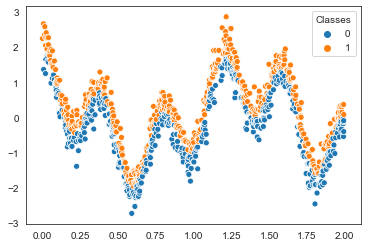

In [196]:
sns.scatterplot(X, y, hue=synth_y)
plt.legend(title='Classes')